# BTC autotrader history analysis

In [412]:
import datetime
import json
import boto3
import io
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
#import seaborn as sns
plt.style.use('ggplot')

In [413]:
csv_file = '../btc-autotrader/lib/data/log/2019-03-05T21:42:24.255151.csv'

In [414]:
df = pd.read_csv(csv_file, names=('datetime', 'cash', 'btc_in_possession', 'btc_current_price', 'position', 'rate_of_change', 'total_value'))

In [415]:
df.datetime = pd.to_datetime(df.datetime)

In [416]:
conditions = [
    (df.position == 'None'),
    (df.position == 'POSSESSING'),
    (df.position == 'BIDDED'),
    (df.position == 'ASKED')
]
choices = [0, 3, 2, 1]
df['position_int'] = np.select(conditions, choices, default=0)

In [417]:
df.tail()

,datetime,cash,btc_in_possession,btc_current_price,position,rate_of_change,total_value,position_int
3096,2019-03-06 04:00:40.069960,95645.0,0.007256,428514.0,None,-0.342867,98754.083327,0
3097,2019-03-06 04:00:48.990668,95645.0,0.007256,428514.0,None,-0.342867,98754.083327,0
3098,2019-03-06 04:00:56.247513,95645.0,0.007256,428514.0,None,-0.342867,98754.083327,0
3099,2019-03-06 04:01:03.520314,95645.0,0.007256,428514.0,None,-0.342867,98754.083327,0
3100,2019-03-06 04:01:10.597489,95645.0,0.007256,428514.0,None,-0.342867,98754.083327,0


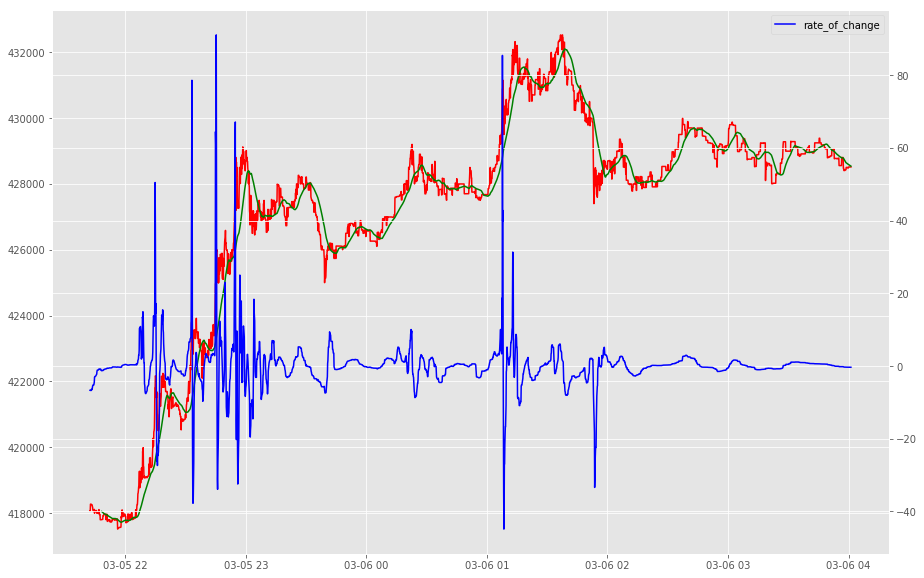

In [418]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
#plt.plot(df.datetime, df.cash)
ax1.plot(df.datetime, df.btc_current_price, color='r')
ax1.plot(df.datetime, df.btc_current_price.rolling(50).mean(), color='g')
ax2.plot(df.datetime, df.rate_of_change, color='b')
plt.legend()
plt.show()

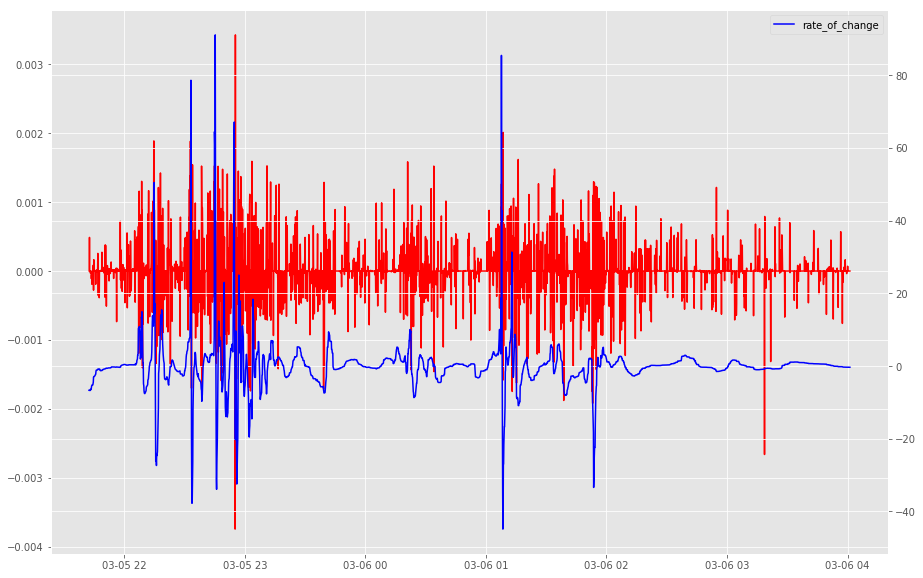

In [419]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
#plt.plot(df.datetime, df.cash)
ax1.plot(df.datetime, df.btc_current_price.pct_change(), color='r', label='percent change')
ax2.plot(df.datetime, df.rate_of_change, color='b')
plt.legend()
plt.show()

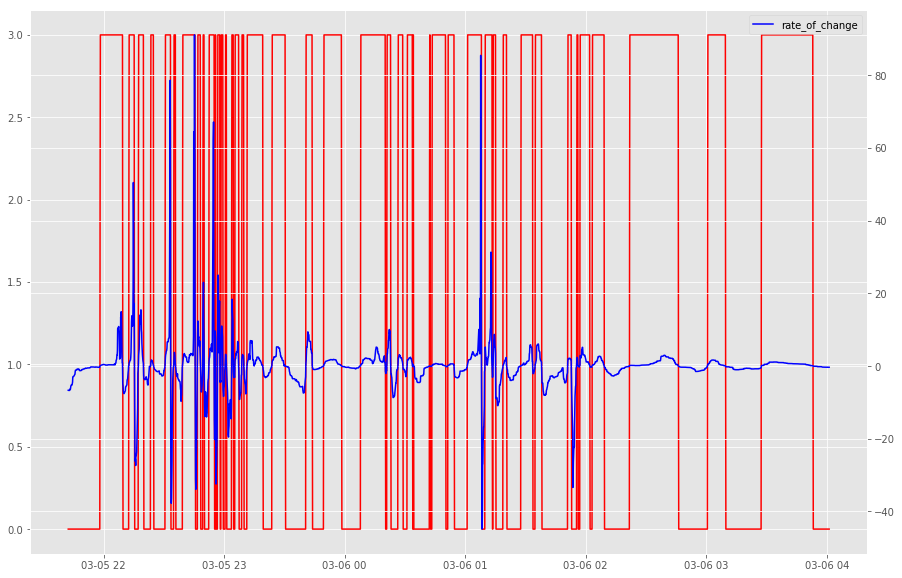

In [420]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
#plt.plot(df.datetime, df.cash)
ax1.plot(df.datetime, df.position_int, color='r')
ax2.plot(df.datetime, df.rate_of_change, color='b')
plt.legend()
plt.show()

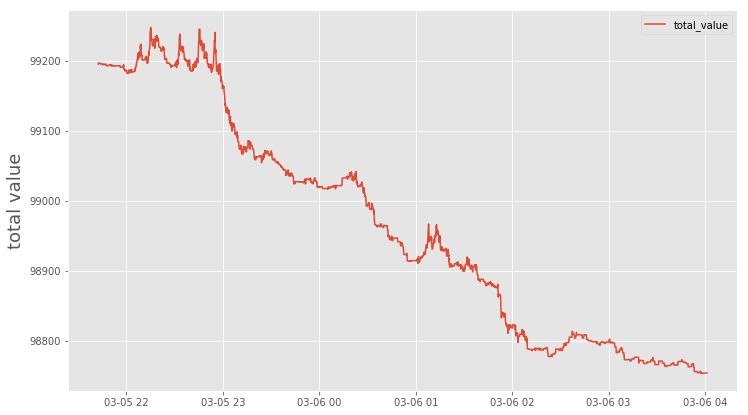

In [421]:
plt.figure(figsize=(12, 7))
plt.plot(df.datetime, df.total_value)
#plt.ylim(83000,83500)
plt.ylabel('total value', fontsize=18)
plt.legend()
plt.show()

## calculate and plot acceleration

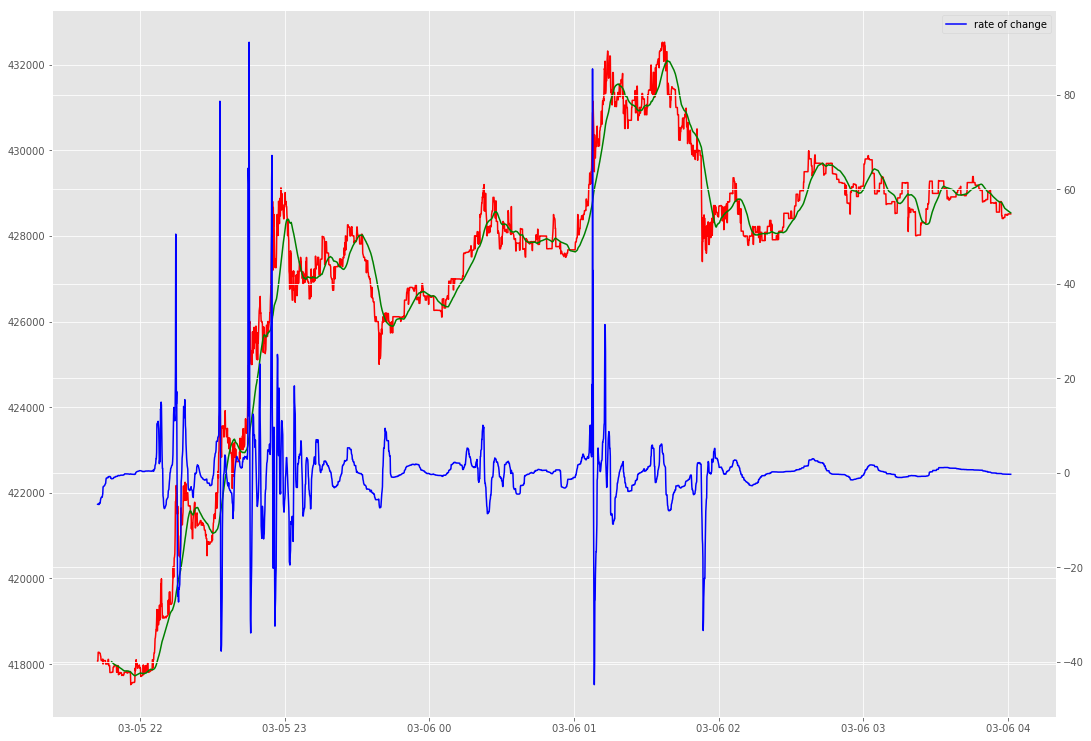

In [422]:
fig, ax1 = plt.subplots(figsize=(18,13))
ax2 = ax1.twinx()
#plt.plot(df.datetime, df.cash)
ax1.plot(df.datetime, df.btc_current_price, color='r', label='current price')
ax1.plot(df.datetime, df.btc_current_price.rolling(50).mean(), color='green', label='moving average price')
ax2.plot(df.datetime, df.rate_of_change, color='b', label='rate of change')
plt.legend()
plt.show()